In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mnist = input_data.read_data_sets('mnist/',one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
### lets see how our data looks like in train
print("Number of datapoints in train",mnist.train.images.shape[0],'Number of pixels',
     mnist.train.images.shape[1])
### lets see how our data looks like in test
print("number of datapoints in test",mnist.test.images.shape[0],'Number of pixels',
     mnist.test.images.shape[1])

Number of datapoints in train 55000 Number of pixels 784
number of datapoints in test 10000 Number of pixels 784


In [4]:
### Lets see how our labelss looks like in train
print("Number of datapoints in train",mnist.train.labels.shape[0],'length of one hot label vector',
     mnist.train.labels.shape[1])
### lets see how our data looks like in test
print("number of datapoints in test",mnist.test.labels.shape[0],'length of one hot label vector',
     mnist.test.labels.shape[1])

Number of datapoints in train 55000 length of one hot label vector 10
number of datapoints in test 10000 length of one hot label vector 10


In [5]:
### Step by step guide to build a MLP
### all you input dataset  is ready in mnist
### We are going to create a MLP with two hidden layer ,h1,h2
### Hidden layer 1  :512 neurons ,hidden layer 2 : 128 neurons
### Step 1 : weight initialization

In [6]:
def plt_dynamic(x, y, y_1, ax, ticks,title, colors=['b']):
    ax.plot(x, y, 'b', label="Train Loss")
    ax.plot(x, y_1, 'r', label="Test Loss")
    if len(x)==1:
        plt.legend()
        plt.title(title)
    plt.yticks(ticks)
    plt.grid()
    fig.canvas.draw()

### Step 1 : weight initialization

In [7]:
n_hidden_1 = 512 # 1st layer number of neurons
n_hidden_2 = 128 # 2nd layer number of neurons
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)
# Weight initialization

# https://arxiv.org/pdf/1707.09725.pdf#page=95
# https://www.tensorflow.org/api_docs/python/tf/random_normal
# Outputs random values from a normal distribution mean=0 std=1

# If we sample weights from a normal distribution N(0,σ) we satisfy 
# this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(fan_in+fan_out+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(fan_in+fan_out+1) = 0.055  => N(0,σ) = N(0,0.055)
# out =>  σ=√(2/(fan_in+fan_out+1) = 0.120  => N(0,σ) = N(0,0.120)
# SGD: Xavier/Glorot Normal initialization.
weights_sgd = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1],stddev=0.039, mean=0)),    
    #784x512 # sqrt(2/(784+512)) = 0.039
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2],stddev=0.055, mean=0)),
    #512x128 # sqrt(2/(512+128)) = 0.055
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes],stddev=0.120, mean=0)) 
    #128x10
}


# https://arxiv.org/pdf/1707.09725.pdf#page=95
# for relu lates
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in+1) = 0.062  => N(0,σ) = N(0,0.062)
# h2 =>  σ=√(2/(fan_in+1) = 0.125  => N(0,σ) = N(0,0.125)
# out =>  σ=√(2/(fan_in+1) = 0.120  => N(0,σ) = N(0,0.120)
# He Normal initialization.
weights_relu = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1],stddev=0.05, mean=0)),    #784x512
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2],stddev=0.06, mean=0)), #512x128
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes],stddev=0.125, mean=0))  #128x10
}
bias_weight = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),             #512x1
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),             #128x1
    'out': tf.Variable(tf.random_normal([n_classes]))              #10x1
}

### Step2 : Set your parameters
 

In [8]:
train_epoch=15
learning_rate=0.01
batch_size=100
display_step=1

### Step3: Define your MLP


In [9]:
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])

In [14]:
def multilayer_perceptron(x,weights,bias):
    # Use tf.matmul instead of "*" because tf.matmul can change it's dimensions on the fly (broadcast)
    print( 'x:', x.get_shape(), 'W[h1]:', weights['h1'].get_shape(), 'b[h1]:', bias['b1'].get_shape())        
    
    # Hidden layer with Sigmoid activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), bias['b1']) #(x*weights['h1']) + biases['b1']
    layer_1 = tf.nn.sigmoid(layer_1)
    print( 'layer_1:', layer_1.get_shape(), 'W[h2]:', weights['h2'].get_shape(), 'b[h2]:', bias['b2'].get_shape())        
    print(layer_1.shape)
    # Hidden layer with Sigmoid activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), bias['b2']) # (layer_1 * weights['h2']) + biases['b2'] 
    layer_2 = tf.nn.sigmoid(layer_2)
    print( 'layer_2:', layer_2.get_shape(), 'W[out]:', weights['out'].get_shape(), 'b3:', bias['out'].get_shape())        
    
    # Output layer with Sigmoid activation
    out_layer = tf.matmul(layer_2, weights['out']) + bias['out'] # (layer_2 * weights['out']) + biases['out']    
    out_layer = tf.nn.sigmoid(out_layer)
    print('out_layer:',out_layer.get_shape())
    
    return out_layer

x: (?, 784) W[h1]: (784, 512) b[h1]: (512,)
layer_1: (?, 512) W[h2]: (512, 128) b[h2]: (128,)
(?, 512)
layer_2: (?, 128) W[out]: (128, 10) b3: (10,)
out_layer: (?, 10)
Epoch: 0001 train cost=1.552024872 test cost=1.547482270
Epoch: 0002 train cost=1.491766864 test cost=1.493328741
Epoch: 0003 train cost=1.484122217 test cost=1.487615898
Epoch: 0004 train cost=1.480529714 test cost=1.485639401
Epoch: 0005 train cost=1.479155267 test cost=1.484390357
Epoch: 0006 train cost=1.477076650 test cost=1.483325364
Epoch: 0007 train cost=1.475574523 test cost=1.482764789
Epoch: 0008 train cost=1.474820625 test cost=1.482851036
Epoch: 0009 train cost=1.474761480 test cost=1.482762125
Epoch: 0010 train cost=1.474058772 test cost=1.482745532
Epoch: 0011 train cost=1.473125976 test cost=1.481503839
Epoch: 0012 train cost=1.472941713 test cost=1.482226009
Epoch: 0013 train cost=1.473346011 test cost=1.482471279
Epoch: 0014 train cost=1.472345418 test cost=1.481831870
Epoch: 0015 train cost=1.472247715

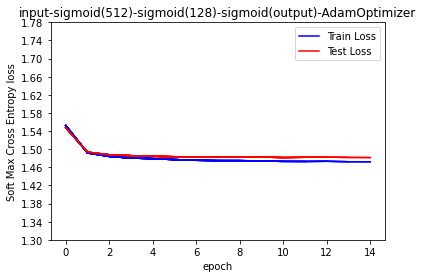

In [19]:
y_sgd = multilayer_perceptron(x,weights_sgd,bias_weight)

## Define the cost function 
cost_sgd =  tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_sgd,labels=y_))

## Define which optimizers you are gonna use
adam_optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost_sgd)
gd_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost_sgd)

with tf.Session() as sess:   
    tf.global_variables_initializer().run()
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('epoch') 
    ax.set_ylabel('Soft Max Cross Entropy loss')
    total_batchsize = mnist.train.num_examples/batch_size
    ep,ytr,ytes =[],[],[]
    for epoch in range(train_epoch):
        train_avg_cost=0   
        test_avg_cost=0
        for batch in range(int(total_batchsize)):
            batch_xs,batch_ys = mnist.train.next_batch(batch_size)
            _,c,w = sess.run([adam_optimizer,cost_sgd,weights_sgd],feed_dict={x:batch_xs,
                                                                             y_:batch_ys})
            train_avg_cost += c/total_batchsize
            batch_xs_t,batch_ys_t = mnist.test.next_batch(batch_size)
            c = sess.run(cost_sgd, feed_dict={x: batch_xs_t, y_:batch_ys_t})
            test_avg_cost +=  c/total_batchsize     
        ep.append(epoch)
        ytr.append(train_avg_cost)
        ytes.append(test_avg_cost)
        plt_dynamic(ep, ytr, ytes, ax, np.arange(1.3, 1.8, step=0.04), "input-sigmoid(512)-sigmoid(128)-sigmoid(output)-AdamOptimizer") 
        print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))
    plt_dynamic(ep, ytr, ytes, ax, np.arange(1.3, 1.8, step=0.04), "input-sigmoid(512)-sigmoid(128)-sigmoid(output)-AdamOptimizer")    
    ## let's find the accuracy
    correct = tf.equal(tf.argmax(y_sgd,1),tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))
    print('Accuracy:',accuracy.eval({x: mnist.test.images, y_: mnist.test.labels}))        

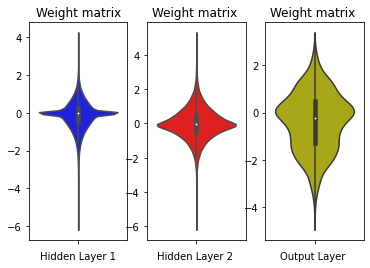

In [20]:
# Plot weight distriubtion at the end of training.

import seaborn as sns
h1_w = w['h1'].flatten().reshape(-1,1)
h2_w = w['h2'].flatten().reshape(-1,1)
out_w = w['out'].flatten().reshape(-1,1)


fig = plt.figure()
plt.subplot(1, 3, 1)
plt.title("Weight matrix")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Weight matrix ")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Weight matrix ")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

x: (?, 784) W[h1]: (784, 512) b[h1]: (512,)
layer_1: (?, 512) W[h2]: (512, 128) b[h2]: (128,)
(?, 512)
layer_2: (?, 128) W[out]: (128, 10) b3: (10,)
out_layer: (?, 10)
Epoch: 0001 train cost=2.323087028 test cost=2.323382610
Epoch: 0002 train cost=2.303839938 test cost=2.303998342
Epoch: 0003 train cost=2.296341914 test cost=2.295935660
Epoch: 0004 train cost=2.293184696 test cost=2.292650836
Epoch: 0005 train cost=2.290084737 test cost=2.289488166
Epoch: 0006 train cost=2.286696923 test cost=2.285937147
Epoch: 0007 train cost=2.282924177 test cost=2.282211470
Epoch: 0008 train cost=2.278735170 test cost=2.277825499
Epoch: 0009 train cost=2.274023618 test cost=2.273062366
Epoch: 0010 train cost=2.268643950 test cost=2.267537307
Epoch: 0011 train cost=2.262478789 test cost=2.261257951
Epoch: 0012 train cost=2.255425074 test cost=2.253984154
Epoch: 0013 train cost=2.247254915 test cost=2.245651297
Epoch: 0014 train cost=2.237846583 test cost=2.235991781
Epoch: 0015 train cost=2.226986179

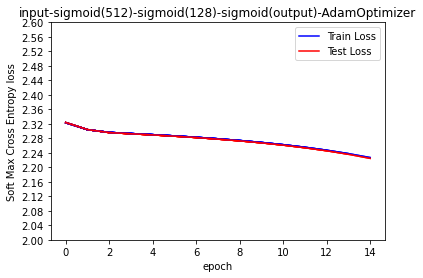

In [21]:
y_sgd = multilayer_perceptron(x,weights_sgd,bias_weight)

## Define the cost function 
cost_sgd =  tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_sgd,labels=y_))

## Define which optimizers you are gonna use
adam_optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost_sgd)
gd_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost_sgd)

with tf.Session() as sess:   
    tf.global_variables_initializer().run()
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('epoch') 
    ax.set_ylabel('Soft Max Cross Entropy loss')
    total_batchsize = mnist.train.num_examples/batch_size
    ep,ytr,ytes =[],[],[]
    for epoch in range(train_epoch):
        train_avg_cost=0   
        test_avg_cost=0
        for batch in range(int(total_batchsize)):
            batch_xs,batch_ys = mnist.train.next_batch(batch_size)
            _,c,w = sess.run([gd_optimizer,cost_sgd,weights_sgd],feed_dict={x:batch_xs,
                                                                             y_:batch_ys})
            train_avg_cost += c/total_batchsize
            batch_xs_t,batch_ys_t = mnist.test.next_batch(batch_size)
            c = sess.run(cost_sgd, feed_dict={x: batch_xs_t, y_:batch_ys_t})
            test_avg_cost +=  c/total_batchsize     
        ep.append(epoch)
        ytr.append(train_avg_cost)
        ytes.append(test_avg_cost)
        plt_dynamic(ep, ytr, ytes, ax, np.arange(2, 2.6, step=0.04), "input-sigmoid(512)-sigmoid(128)-sigmoid(output)-AdamOptimizer") 
        print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))
    plt_dynamic(ep, ytr, ytes, ax, np.arange(2, 2.6, step=0.04), "input-sigmoid(512)-sigmoid(128)-sigmoid(output)-AdamOptimizer")    

    ## calculating final accuracy on test data
    ## let's find the accuracy
    correct = tf.equal(tf.argmax(y_sgd,1),tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))
    print('Accuracy:',accuracy.eval({x: mnist.test.images, y_: mnist.test.labels}))

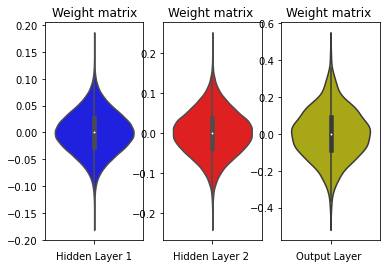

In [22]:
# Plot weight distriubtion at the end of training.

import seaborn as sns
h1_w = w['h1'].flatten().reshape(-1,1)
h2_w = w['h2'].flatten().reshape(-1,1)
out_w = w['out'].flatten().reshape(-1,1)


fig = plt.figure()
plt.subplot(1, 3, 1)
plt.title("Weight matrix")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Weight matrix ")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Weight matrix ")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### Relu - ADAM

In [25]:
def multilayer_perceptron_relu(x,weights,bias):
    # Use tf.matmul instead of "*" because tf.matmul can change it's dimensions on the fly (broadcast)
    print( 'x:', x.get_shape(), 'W[h1]:', weights['h1'].get_shape(), 'b[h1]:', bias['b1'].get_shape())        
    
    # Hidden layer with relu activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), bias['b1']) #(x*weights['h1']) + bias['b1']
    layer_1 = tf.nn.relu(layer_1)
    print( 'layer_1:', layer_1.get_shape(), 'W[h2]:', weights['h2'].get_shape(), 'b[h2]:', bias['b2'].get_shape())        
    print(layer_1.shape)
    # Hidden layer with relu activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), bias['b2']) # (layer_1 * weights['h2']) + bias['b2'] 
    layer_2 = tf.nn.relu(layer_2)
    print( 'layer_2:', layer_2.get_shape(), 'W[out]:', weights['out'].get_shape(), 'b3:', bias['out'].get_shape())        
    
    # Output layer with Sigmoid activation since 
    out_layer = tf.matmul(layer_2, weights['out']) + bias['out'] # (layer_2 * weights['out']) + bias['out']    
    out_layer = tf.nn.sigmoid(out_layer)
    print('out_layer:',out_layer.get_shape())
    
    return out_layer

x: (?, 784) W[h1]: (784, 512) b[h1]: (512,)
layer_1: (?, 512) W[h2]: (512, 128) b[h2]: (128,)
(?, 512)
layer_2: (?, 128) W[out]: (128, 10) b3: (10,)
out_layer: (?, 10)
Epoch: 0001 train cost=1.550453825 test cost=1.548038660
Epoch: 0002 train cost=1.526322245 test cost=1.526471169
Epoch: 0003 train cost=1.539277756 test cost=1.539149684
Epoch: 0004 train cost=1.537834511 test cost=1.537288711
Epoch: 0005 train cost=1.544253463 test cost=1.543427398
Epoch: 0006 train cost=1.542680765 test cost=1.542444393
Epoch: 0007 train cost=1.544543529 test cost=1.543878434
Epoch: 0008 train cost=1.547021188 test cost=1.545877384
Epoch: 0009 train cost=1.569567535 test cost=1.565718125
Epoch: 0010 train cost=1.566689730 test cost=1.565505993
Epoch: 0011 train cost=1.586615928 test cost=1.583177050
Epoch: 0012 train cost=1.571711588 test cost=1.567061380
Epoch: 0013 train cost=1.546339032 test cost=1.543090623
Epoch: 0014 train cost=1.538779955 test cost=1.537753716
Epoch: 0015 train cost=1.537627180

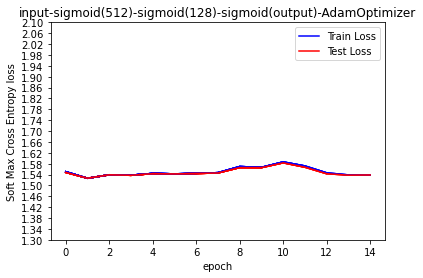

In [26]:
y_relu = multilayer_perceptron_relu(x,weights_relu,bias_weight)

## Define the cost function 
cost_relu =  tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_relu,labels=y_))

## Define which optimizers you are gonna use
adam_optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost_relu)
gd_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost_relu)

with tf.Session() as sess:   
    tf.global_variables_initializer().run()
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('epoch') 
    ax.set_ylabel('Soft Max Cross Entropy loss')
    total_batchsize = mnist.train.num_examples/batch_size
    ep,ytr,ytes =[],[],[]
    for epoch in range(train_epoch):
        train_avg_cost=0   
        test_avg_cost=0
        for batch in range(int(total_batchsize)):
            batch_xs,batch_ys = mnist.train.next_batch(batch_size)
            _,c,w = sess.run([adam_optimizer,cost_relu,weights_relu],feed_dict={x:batch_xs,
                                                                             y_:batch_ys})
            train_avg_cost += c/total_batchsize
            batch_xs_t,batch_ys_t = mnist.test.next_batch(batch_size)
            c = sess.run(cost_relu, feed_dict={x: batch_xs_t, y_:batch_ys_t})
            test_avg_cost +=  c/total_batchsize     
        ep.append(epoch)
        ytr.append(train_avg_cost)
        ytes.append(test_avg_cost)
        plt_dynamic(ep, ytr, ytes, ax, np.arange(1.3, 2.13, step=0.04), "input-sigmoid(512)-sigmoid(128)-sigmoid(output)-AdamOptimizer") 
        print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))
    plt_dynamic(ep, ytr, ytes, ax, np.arange(1.3, 2.13, step=0.04), "input-sigmoid(512)-sigmoid(128)-sigmoid(output)-AdamOptimizer")    
     ## let's find the accuracy
    correct = tf.equal(tf.argmax(y_relu,1),tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))
    print('Accuracy:',accuracy.eval({x: mnist.test.images, y_: mnist.test.labels}))       

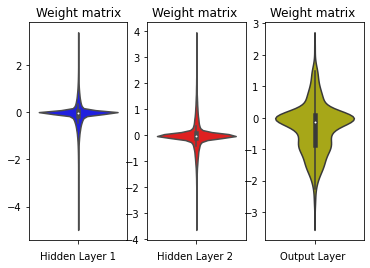

In [27]:
# Plot weight distriubtion at the end of training.

import seaborn as sns
h1_w = w['h1'].flatten().reshape(-1,1)
h2_w = w['h2'].flatten().reshape(-1,1)
out_w = w['out'].flatten().reshape(-1,1)


fig = plt.figure()
plt.subplot(1, 3, 1)
plt.title("Weight matrix")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Weight matrix ")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Weight matrix ")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

In [28]:
y_relu

<tf.Tensor 'Sigmoid_18:0' shape=(?, 10) dtype=float32>

x: (?, 784) W[h1]: (784, 512) b[h1]: (512,)
layer_1: (?, 512) W[h2]: (512, 128) b[h2]: (128,)
(?, 512)
layer_2: (?, 128) W[out]: (128, 10) b3: (10,)
out_layer: (?, 10)
Epoch: 0001 train cost=2.109380573 test cost=2.102645537
Epoch: 0002 train cost=1.825618986 test cost=1.816985177
Epoch: 0003 train cost=1.739364429 test cost=1.731785622
Epoch: 0004 train cost=1.698319761 test cost=1.691191676
Epoch: 0005 train cost=1.673121313 test cost=1.666049563
Epoch: 0006 train cost=1.655449651 test cost=1.648500248
Epoch: 0007 train cost=1.642125476 test cost=1.635478471
Epoch: 0008 train cost=1.631625854 test cost=1.624979670
Epoch: 0009 train cost=1.623121532 test cost=1.616790021
Epoch: 0010 train cost=1.616118824 test cost=1.609657433
Epoch: 0011 train cost=1.610057803 test cost=1.604017017
Epoch: 0012 train cost=1.604881978 test cost=1.598817400
Epoch: 0013 train cost=1.600342083 test cost=1.594510952
Epoch: 0014 train cost=1.596385343 test cost=1.590937932
Epoch: 0015 train cost=1.592850965

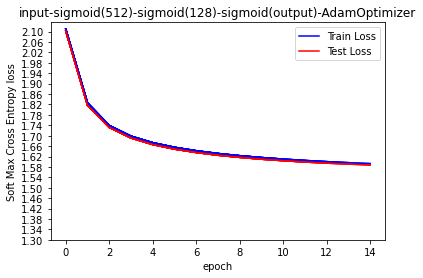

In [29]:
y_relu = multilayer_perceptron_relu(x,weights_relu,bias_weight)

## Define the cost function 
cost_relu =  tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_relu,labels=y_))

## Define which optimizers you are gonna use
adam_optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost_relu)
gd_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost_relu)

with tf.Session() as sess:   
    tf.global_variables_initializer().run()
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('epoch') 
    ax.set_ylabel('Soft Max Cross Entropy loss')
    total_batchsize = mnist.train.num_examples/batch_size
    ep,ytr,ytes =[],[],[]
    for epoch in range(train_epoch):
        train_avg_cost=0   
        test_avg_cost=0
        for batch in range(int(total_batchsize)):
            batch_xs,batch_ys = mnist.train.next_batch(batch_size)
            _,c,w = sess.run([gd_optimizer,cost_relu,weights_relu],feed_dict={x:batch_xs,
                                                                             y_:batch_ys})
            train_avg_cost += c/total_batchsize
            batch_xs_t,batch_ys_t = mnist.test.next_batch(batch_size)
            c = sess.run(cost_relu, feed_dict={x: batch_xs_t, y_:batch_ys_t})
            test_avg_cost +=  c/total_batchsize     
        ep.append(epoch)
        ytr.append(train_avg_cost)
        ytes.append(test_avg_cost)
        plt_dynamic(ep, ytr, ytes, ax, np.arange(1.3, 2.13, step=0.04),"input-sigmoid(512)-sigmoid(128)-sigmoid(output)-AdamOptimizer") 
        print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))
    plt_dynamic(ep, ytr, ytes, ax, np.arange(1.3, 2.13, step=0.04), "input-sigmoid(512)-sigmoid(128)-sigmoid(output)-AdamOptimizer")    
    ## let's find the accuracy
    correct = tf.equal(tf.argmax(y_relu,1),tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))
    print('Accuracy:',accuracy.eval({x: mnist.test.images, y_: mnist.test.labels}))      

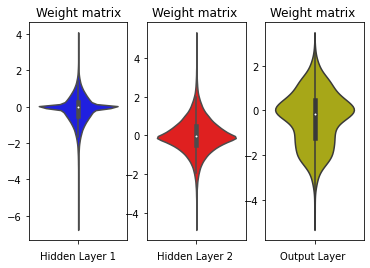

In [38]:
# Plot weight distriubtion at the end of training.

import seaborn as sns
h1_w = w['h1'].flatten().reshape(-1,1)
h2_w = w['h2'].flatten().reshape(-1,1)
out_w = w['out'].flatten().reshape(-1,1)


fig = plt.figure()
plt.subplot(1, 3, 1)
plt.title("Weight matrix")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Weight matrix ")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Weight matrix ")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### Batch normalization

In [39]:
epsilon = 1e-3
def multilayer_perceptron_BN(x,weights,bias):
    # Use tf.matmul instead of "*" because tf.matmul can change it's dimensions on the fly (broadcast)
    print( 'x:', x.get_shape(), 'W[h1]:', weights['h1'].get_shape(), 'b[h1]:', bias['b1'].get_shape())        
    
    # Hidden layer with Sigmoid activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), bias['b1']) #(x*weights['h1']) + bias['b1']
    
    ## batch normalize here after layer 1  -btach,mean,batch_var,beta,scale
    batch_mean,batch_var =tf.nn.moments(layer_1,[0])
    scale_1 = tf.Variable(tf.ones([n_hidden_1]))
    beta_1 = tf.Variable(tf.zeros([n_hidden_1]))
    layer1 = tf.nn.batch_normalization(layer_1,mean=batch_mean,variance=batch_var,offset=beta_1,scale=scale_1,
                                       variance_epsilon=epsilon)
    layer_1 = tf.nn.sigmoid(layer_1)
    
    print( 'layer_1:', layer_1.get_shape(), 'W[h2]:', weights['h2'].get_shape(), 'b[h2]:', bias['b2'].get_shape())        
    print(layer_1.shape)
    # Hidden layer with Sigmoid activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), bias['b2']) # (layer_1 * weights['h2']) + bias['b2'] 
    
    ## batch normalize here after layer 2  -btach,mean,batch_var,beta,scale
    batch_mean,batch_var =tf.nn.moments(layer_2,[0])
    scale_1 = tf.Variable(tf.ones([n_hidden_2]))
    beta_1 = tf.Variable(tf.zeros([n_hidden_2]))
    layer2 = tf.nn.batch_normalization(layer_2,mean=batch_mean,variance=batch_var,offset=beta_1,scale=scale_1,
                                       variance_epsilon=epsilon)    
    layer_2 = tf.nn.sigmoid(layer_2)
    print( 'layer_2:', layer_2.get_shape(), 'W[out]:', weights['out'].get_shape(), 'b3:', bias['out'].get_shape())        
    
    # Output layer with Sigmoid activation
    out_layer = tf.matmul(layer_2, weights['out']) + bias['out'] # (layer_2 * weights['out']) + bias['out']    
    out_layer = tf.nn.sigmoid(out_layer)
    print('out_layer:',out_layer.get_shape())
    
    return out_layer

x: (?, 784) W[h1]: (784, 512) b[h1]: (512,)
layer_1: (?, 512) W[h2]: (512, 128) b[h2]: (128,)
(?, 512)
layer_2: (?, 128) W[out]: (128, 10) b3: (10,)
out_layer: (?, 10)
Epoch: 0001 train cost=1.549360544 test cost=1.544183836
Epoch: 0002 train cost=1.491348060 test cost=1.492316634
Epoch: 0003 train cost=1.484435063 test cost=1.487225472
Epoch: 0004 train cost=1.480057666 test cost=1.485265556
Epoch: 0005 train cost=1.478401130 test cost=1.483969417
Epoch: 0006 train cost=1.476478895 test cost=1.482621685
Epoch: 0007 train cost=1.476413541 test cost=1.483877178
Epoch: 0008 train cost=1.475247091 test cost=1.483194085
Epoch: 0009 train cost=1.474713943 test cost=1.482253982
Epoch: 0010 train cost=1.473950645 test cost=1.482687630
Epoch: 0011 train cost=1.473071034 test cost=1.482448713
Epoch: 0012 train cost=1.472857585 test cost=1.482027229
Epoch: 0013 train cost=1.472443521 test cost=1.482279407
Epoch: 0014 train cost=1.472315258 test cost=1.481475173
Epoch: 0015 train cost=1.472269573

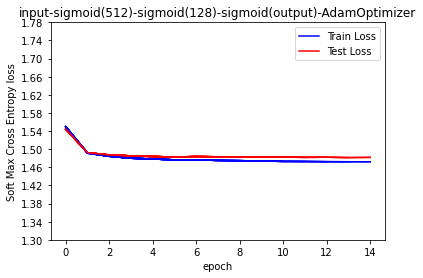

In [40]:
y_sgd = multilayer_perceptron_BN(x,weights_sgd,bias_weight)

## Define the cost function 
cost_sgd =  tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_sgd,labels=y_))

## Define which optimizers you are gonna use
adam_optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost_sgd)
gd_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost_sgd)

with tf.Session() as sess:   
    tf.global_variables_initializer().run()
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('epoch') 
    ax.set_ylabel('Soft Max Cross Entropy loss')
    total_batchsize = mnist.train.num_examples/batch_size
    ep,ytr,ytes =[],[],[]
    for epoch in range(train_epoch):
        train_avg_cost=0   
        test_avg_cost=0
        for batch in range(int(total_batchsize)):
            batch_xs,batch_ys = mnist.train.next_batch(batch_size)
            _,c,w = sess.run([adam_optimizer,cost_sgd,weights_sgd],feed_dict={x:batch_xs,
                                                                             y_:batch_ys})
            train_avg_cost += c/total_batchsize
            batch_xs_t,batch_ys_t = mnist.test.next_batch(batch_size)
            c = sess.run(cost_sgd, feed_dict={x: batch_xs_t, y_:batch_ys_t})
            test_avg_cost +=  c/total_batchsize     
        ep.append(epoch)
        ytr.append(train_avg_cost)
        ytes.append(test_avg_cost)
        plt_dynamic(ep, ytr, ytes, ax, np.arange(1.3, 1.8, step=0.04), "input-sigmoid(512)-sigmoid(128)-sigmoid(output)-AdamOptimizer") 
        print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))
    plt_dynamic(ep, ytr, ytes, ax, np.arange(1.3, 1.8, step=0.04), "input-sigmoid(512)-sigmoid(128)-sigmoid(output)-AdamOptimizer")    
    ## let's find the accuracy
    correct = tf.equal(tf.argmax(y_relu,1),tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))
    print('Accuracy:',accuracy.eval({x: mnist.test.images, y_: mnist.test.labels}))         

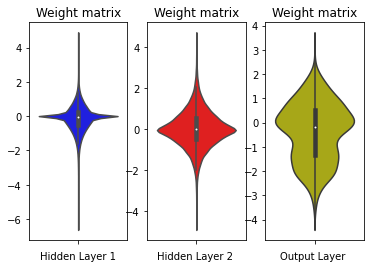

In [41]:
h1_w = w['h1'].flatten().reshape(-1,1)
h2_w = w['h2'].flatten().reshape(-1,1)
out_w = w['out'].flatten().reshape(-1,1)


fig = plt.figure()
plt.subplot(1, 3, 1)
plt.title("Weight matrix")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Weight matrix")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Weight matrix")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### DROP OUTS

In [53]:

def multilayer_perceptron_relu_dropout(x,weights,bias):
    # Use tf.matmul instead of "*" because tf.matmul can change it's dimensions on the fly (broadcast)
    print( 'x:', x.get_shape(), 'W[h1]:', weights['h1'].get_shape(), 'b[h1]:', bias['b1'].get_shape())        
    
    # Hidden layer with relu activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), bias['b1']) #(x*weights['h1']) + bias['b1']
    layer_1 = tf.nn.relu(layer_1)
    layer1_dropout = tf.nn.dropout(layer_1,keep_prob)
    print( 'layer_1:', layer_1.get_shape(), 'W[h2]:', weights['h2'].get_shape(), 'b[h2]:', bias['b2'].get_shape())        
    print(layer_1.shape)
    # Hidden layer with relu activation
    layer_2 = tf.add(tf.matmul(layer1_dropout, weights['h2']), bias['b2']) # (layer_1 * weights['h2']) + bias['b2'] 
    layer_2 = tf.nn.relu(layer_2)
    layer2_dropout = tf.nn.dropout(layer_2,keep_prob)
    print( 'layer_2:', layer_2.get_shape(), 'W[out]:', weights['out'].get_shape(), 'b3:', bias['out'].get_shape())        
    
    # Output layer with Sigmoid activation since 
    out_layer = tf.matmul(layer2_dropout, weights['out']) + bias['out'] # (layer_2 * weights['out']) + bias['out']    
    out_layer = tf.nn.sigmoid(out_layer)
    print('out_layer:',out_layer.get_shape())
    
    return out_layer

x: (?, 784) W[h1]: (784, 512) b[h1]: (512,)
layer_1: (?, 512) W[h2]: (512, 128) b[h2]: (128,)
(?, 512)
layer_2: (?, 128) W[out]: (128, 10) b3: (10,)
out_layer: (?, 10)
Epoch: 0001 train cost=1.624149222 test cost=1.565290355
Epoch: 0002 train cost=1.617065180 test cost=1.556231648
Epoch: 0003 train cost=1.632058951 test cost=1.567345357
Epoch: 0004 train cost=1.644472521 test cost=1.577220305
Epoch: 0005 train cost=1.654105705 test cost=1.582690393
Epoch: 0006 train cost=1.647481084 test cost=1.571714979
Epoch: 0007 train cost=1.664621426 test cost=1.584322944
Epoch: 0008 train cost=1.667749080 test cost=1.582747430
Epoch: 0009 train cost=1.651849230 test cost=1.577313617
Epoch: 0010 train cost=1.652369740 test cost=1.581337894
Epoch: 0011 train cost=1.660999012 test cost=1.583196024
Epoch: 0012 train cost=1.690427249 test cost=1.612970612
Epoch: 0013 train cost=1.653895909 test cost=1.576254410
Epoch: 0014 train cost=1.666822821 test cost=1.587562656
Epoch: 0015 train cost=1.666003657

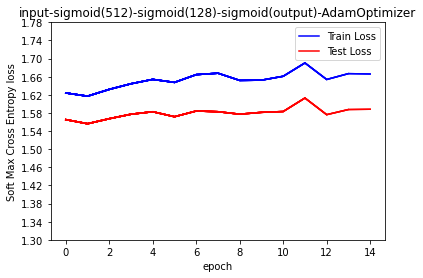

In [57]:
y_relu = multilayer_perceptron_relu_dropout(x,weights_sgd,bias_weight)

## Define the cost function 
cost_sgd =  tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_relu,labels=y_))

## Define which optimizers you are gonna use
adam_optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost_sgd)
gd_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost_sgd)

with tf.Session() as sess:   
    tf.global_variables_initializer().run()
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('epoch') 
    ax.set_ylabel('Soft Max Cross Entropy loss')
    total_batchsize = mnist.train.num_examples/batch_size
    ep,ytr,ytes =[],[],[]
    for epoch in range(train_epoch):
        train_avg_cost=0   
        test_avg_cost=0
        for batch in range(int(total_batchsize)):
            batch_xs,batch_ys = mnist.train.next_batch(batch_size)
            _,c,w = sess.run([adam_optimizer,cost_sgd,weights_sgd],feed_dict={x:batch_xs,
                                                                             y_:batch_ys,keep_prob:0.5})
            train_avg_cost += c/total_batchsize
            batch_xs_t,batch_ys_t = mnist.test.next_batch(batch_size)
            c = sess.run(cost_sgd, feed_dict={x: batch_xs_t, y_:batch_ys_t,keep_prob:1})
            test_avg_cost +=  c/total_batchsize     
        ep.append(epoch)
        ytr.append(train_avg_cost)
        ytes.append(test_avg_cost)
        plt_dynamic(ep, ytr, ytes, ax, np.arange(1.3, 1.8, step=0.04), "input-sigmoid(512)-sigmoid(128)-sigmoid(output)-AdamOptimizer") 
        print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))
    plt_dynamic(ep, ytr, ytes, ax, np.arange(1.3, 1.8, step=0.04), "input-sigmoid(512)-sigmoid(128)-sigmoid(output)-AdamOptimizer")    
    ## let's find the accuracy
    correct = tf.equal(tf.argmax(y_relu,1),tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))
    print('Accuracy:',accuracy.eval({x: mnist.test.images, y_: mnist.test.labels,keep_prob:1}))  

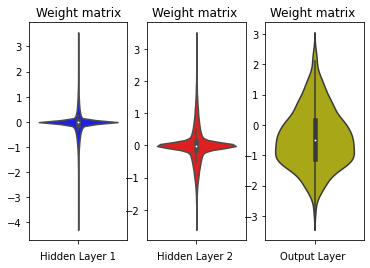

In [58]:
# Plot weight distriubtion at the end of training.

import seaborn as sns
h1_w = w['h1'].flatten().reshape(-1,1)
h2_w = w['h2'].flatten().reshape(-1,1)
out_w = w['out'].flatten().reshape(-1,1)


fig = plt.figure()
plt.subplot(1, 3, 1)
plt.title("Weight matrix")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Weight matrix ")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Weight matrix ")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()